In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


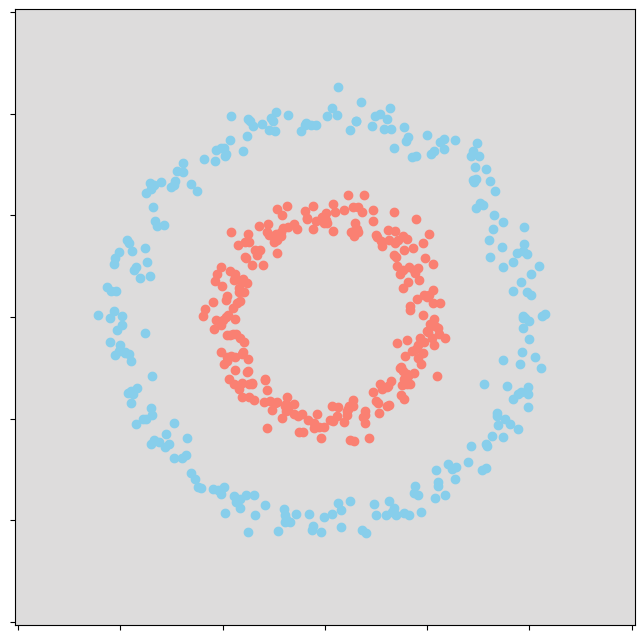

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.datasets import make_circles

X,Y = make_circles(n_samples=500, factor=0.5, noise=0.05)
res = 100
#Coordenandas
_x0= np.linspace(-1.5, 1.5, res)
_x1= np.linspace(-1.5, 1.5, res)

_pX= np.array(np.meshgrid(_x0, _x1)).T.reshape(-1,2)


#Objeto vacio

_pY =np.zeros((res, res)) + 0.5

#Visualizar
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0, _x1, _pY, cmap='coolwarm',vmin=0,vmax=1)

#Datos

plt.scatter(X[Y==0,0], X[Y==0,1], c="skyblue")
plt.scatter(X[Y==1,0], X[Y==1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)


In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import animation
from IPython.display import display, HTML
# Definimos los puntos de entrada de la red, para la matriz X e Y. ix = tf.placeholder('float', shape=[None, X.shape[1]])
iy = tf.placeholder('float', shape=[None])
lr = 0.01
# learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.
ix = tf.placeholder('float', shape=[None, X.shape[1]])  # Define el placeholder para las entradas





Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import animation
from IPython.display import display, HTML
# Definimos los puntos de entrada de la red, para la matriz X e Y.
ix = tf.placeholder('float', shape=[None, X.shape[1]]) # Define ix as a placeholder
iy = tf.placeholder('float', shape=[None])
lr = 0.01
# learning rate
nn = [2, 16, 8, 1] # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name="Weights_1")
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(ix, W1), b1))
# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))
# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name="weights_3")
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

#Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul (l2, W3), b3))[:, 0]

#Evaluación de las predicciones.
loss = tf.compat.v1.losses.mean_squared_error(pY, iy)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.
iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.



Step 0 / 1000 - Loss = 0.3591021 , Acc = 0.608
Step 25 / 1000 - Loss = 0.31754115 , Acc = 0.602
Step 50 / 1000 - Loss = 0.2863749 , Acc = 0.646
Step 75 / 1000 - Loss = 0.2545995 , Acc = 0.696
Step 100 / 1000 - Loss = 0.21648562 , Acc = 0.752
Step 125 / 1000 - Loss = 0.17515552 , Acc = 0.822
Step 150 / 1000 - Loss = 0.14460471 , Acc = 0.878
Step 175 / 1000 - Loss = 0.12755449 , Acc = 0.892
Step 200 / 1000 - Loss = 0.11671779 , Acc = 0.91
Step 225 / 1000 - Loss = 0.10783963 , Acc = 0.922
Step 250 / 1000 - Loss = 0.09974153 , Acc = 0.932
Step 275 / 1000 - Loss = 0.09224038 , Acc = 0.94
Step 300 / 1000 - Loss = 0.08524408 , Acc = 0.95
Step 325 / 1000 - Loss = 0.07848549 , Acc = 0.962
Step 350 / 1000 - Loss = 0.07187634 , Acc = 0.972
Step 375 / 1000 - Loss = 0.06544684 , Acc = 0.974
Step 400 / 1000 - Loss = 0.05934179 , Acc = 0.984
Step 425 / 1000 - Loss = 0.05373743 , Acc = 0.994
Step 450 / 1000 - Loss = 0.048639465 , Acc = 0.994
Step 475 / 1000 - Loss = 0.04405541 , Acc = 0.996
Step 500 /


KeyboardInterrupt



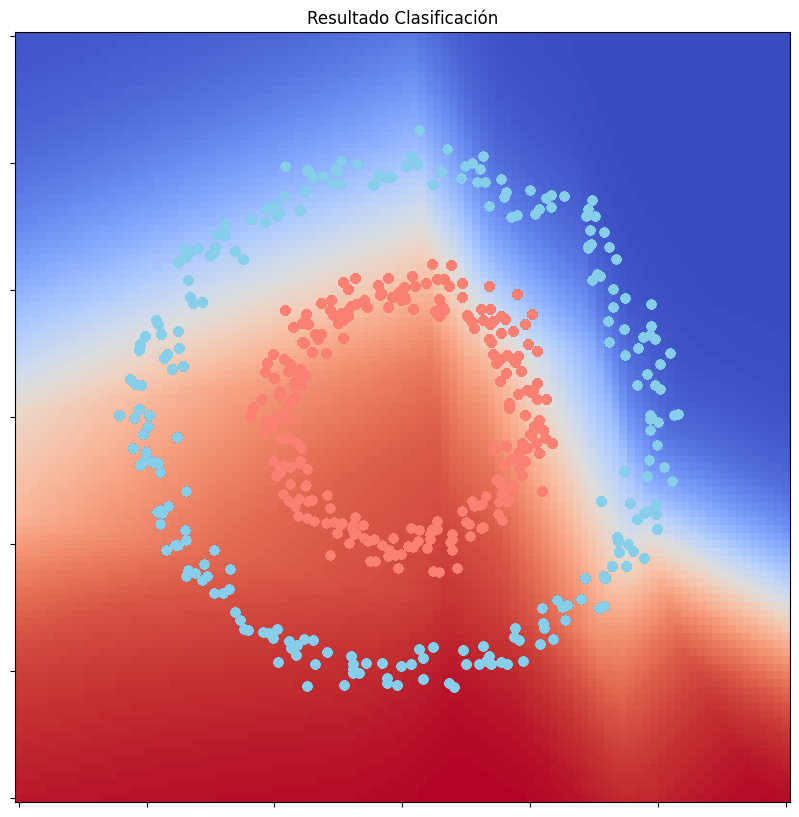

In [ ]:


# Sesión de TensorFlow
with tf.Session() as sess:
    # Inicializamos todos los parámetros de la red, las matrices y b
    sess.run(tf.global_variables_initializer())

    # Iteramos n pasos de entrenamiento
    for step in range(n_steps):
        # Evaluamos al optimizador, a la función de coste y al tensor de salida pY
        _, __loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ix: X, iy: Y})

        # Cada 25 iteraciones, imprimimos métricas
        if step % 25 == 0:
            # Cálculo del accuracy
            acc = np.mean(np.round(_pY) == Y)
            # Impresión de métricas
            print('Step', step, '/', n_steps, '- Loss =', __loss, ', Acc =', acc)

        # Obtenemos predicciones para cada punto de nuestro mapa de predicción px
        _py = sess.run(pY, feed_dict={ix: _pX}).reshape((res, res))
        # Y lo guardamos para visualizar la animación
        iPY.append(_py)

    ims = []
    # CÓDIGO ANIMACIÓN
    fig = plt.figure(figsize=(10, 10))
    print("Generando animación ---")
    for fr in range(len(iPY)):
        im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
        # Visualización de la nube de datos
        plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
        plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
        plt.title("Resultado Clasificación")
        plt.tick_params(labelbottom=False, labelleft=False)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
    display(HTML(ani.to_html5_video()))


In [ ]:
import tensorflow  as tf
import tensorflow.keras as kr
from IPython.display import display, HTML


lr = 0.01
nn = [2, 16, 8, 1]

model = kr.Sequential()
model.add(kr.layers.Dense(nn[1], activation='relu'))
model.add(kr.layers.Dense(nn[2], activation='relu'))
model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

In [ ]:
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['acc'])

In [ ]:
import sklearn as sk
import sklearn.neural_network
from IPython.core.display import display, HTML
lr = 0.01
nn = [2, 16, 8, 1]


C:\Users\yjzabalam\AppData\Local\Temp\ipykernel_8744\3540881641.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
clf= sk.neural_network.MLPRegressor(solver='sgd',
                                    learning_rate_init=lr,
                                    hidden_layer_sizes=tuple(nn[1:]),
                                    verbose=True,
                                    n_iter_no_change=1000,
                                    batch_size=64)



In [ ]:
clf.fit(X, Y)

C:\Users\yjzabalam\.anaconda\Nueva carpeta\envs\curso_python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.15876790
Iteration 2, loss = 0.14205613
Iteration 3, loss = 0.12051406
Iteration 4, loss = 0.09893620
Iteration 5, loss = 0.08033080
Iteration 6, loss = 0.06548827
Iteration 7, loss = 0.05666283
Iteration 8, loss = 0.05009510
Iteration 9, loss = 0.04683255
Iteration 10, loss = 0.04565093
Iteration 11, loss = 0.04512013
Iteration 12, loss = 0.04578317
Iteration 13, loss = 0.04641969
Iteration 14, loss = 0.04673745
Iteration 15, loss = 0.04709193
Iteration 16, loss = 0.04722502
Iteration 17, loss = 0.04718086
Iteration 18, loss = 0.04697303
Iteration 19, loss = 0.04668065
Iteration 20, loss = 0.04635263
Iteration 21, loss = 0.04609190
Iteration 22, loss = 0.04573377
Iteration 23, loss = 0.04548066
Iteration 24, loss = 0.04535166
Iteration 25, loss = 0.04528492
Iteration 26, loss = 0.04519504
Iteration 27, loss = 0.04519666
Iteration 28, loss = 0.04514853
Iteration 29, loss = 0.04519078
Iteration 30, loss = 0.04519308
Iteration 31, loss = 0.04516832
Iteration 32, los

C:\Users\yjzabalam\.anaconda\Nueva carpeta\envs\curso_python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)